In [1]:
using Plots, LinearAlgebra, IterativeSolvers

## Exercise 2

In [329]:
function make_A(M)
   # Step size
   h = 1/(M+1)
    
    # Xjs of interest
    xjs = [j*h for j in 1:M]
    
    # Defining diagonal
    diagA = [ -2 for xj in xjs]
    diagB = [ 1 for xj in xjs[1:M-1]]
    
    ##Building Matrix
    A = Array(Tridiagonal(diagB, diagA, diagB))
    #A[end, [M, M-1, M-2]] .= 3*h/2, -2*h, h/2
    A = A ./ h^2 
    
    return A
end

# Generate MxM approximation
M = 255
A = make_A(M)

255×255 Array{Float64,2}:
 -131072.0    65536.0        0.0  …        0.0        0.0        0.0
   65536.0  -131072.0    65536.0           0.0        0.0        0.0
       0.0    65536.0  -131072.0           0.0        0.0        0.0
       0.0        0.0    65536.0           0.0        0.0        0.0
       0.0        0.0        0.0           0.0        0.0        0.0
       0.0        0.0        0.0  …        0.0        0.0        0.0
       0.0        0.0        0.0           0.0        0.0        0.0
       0.0        0.0        0.0           0.0        0.0        0.0
       0.0        0.0        0.0           0.0        0.0        0.0
       0.0        0.0        0.0           0.0        0.0        0.0
       0.0        0.0        0.0  …        0.0        0.0        0.0
       0.0        0.0        0.0           0.0        0.0        0.0
       0.0        0.0        0.0           0.0        0.0        0.0
       ⋮                          ⋱                        
       0.0       

In [330]:
function make_F(M, f, α = 0, β = 0)
    # Step size
    h = 1/(M+1)
    
    # Xjs of interest
    xjs = [j*h for j in 1:M]
    
    F = [ f(xj) for xj in xjs]
    F[1] -= α / h^2
    F[end] -= β / h^2
    return F
end

ϕ(x) = 20π*x^3
ϕ_p(x) = 60π*x^2
ϕ_pp(x) = 120π*x
a = 0.5

f(x) = -20 + a*ϕ_pp(x)*cos(ϕ(x)) - a*(ϕ_p(x))^2*sin(ϕ(x))
F = make_F(M, f, 1, 3)

255-element Array{Float64,1}:
  -65555.26368922183
     -18.527378446273538
     -17.791067710615692
     -17.0547572256601
     -16.31844772269389
     -15.582141112779148
     -14.845841562428523
     -14.109557089764055
     -13.373301785243724
     -12.637098761020129
     -11.900983932953629
     -11.165010739222906
     -10.429255899335724
       ⋮
   12193.68059167691
   14829.756818078598
   10931.344580565343
    1902.3557347421106
   -8374.04615570515
  -15145.663490619392
  -14990.391565451891
   -7598.550065824561
    3799.4018909742267
   13740.686498107276
   17113.666305882147
 -184780.6754116434

In [331]:
true_u(x) = 1 + 12*x - 10*x^2 + a*sin(ϕ(x))

true_u (generic function with 1 method)

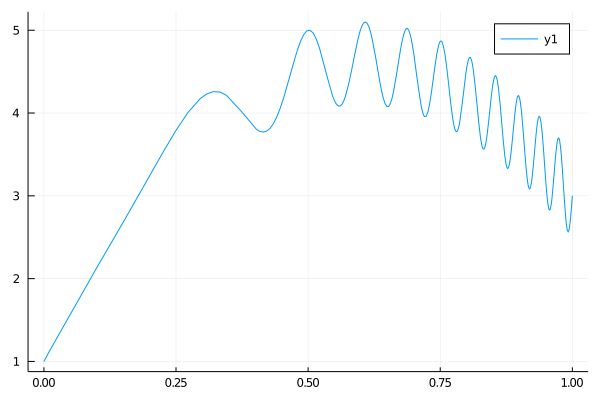

In [332]:
plot(x -> true_u(x), 0, 1)

In [333]:
function get_error(u, uhat, xjs)
    error = (u.(xjs) .- uhat)
    return abs.(error)
end

function get_L2_error(u, uhat, xjs)
    error = get_error(u, uhat, xjs)
    h = 1/ (1 + length(xjs))
    
    error = h*(error .^2)
    error = sum(error)
    return (error)
end



get_L2_error (generic function with 2 methods)

In [334]:
function get_error(u, uhat)
    h = 1/ (1 + length(uhat))
    M = length(uhat)
    
    error = [u.(h*i) .- uhat[i] for i in 1:M]
    return abs.(error)
end

function get_L2_error(u, uhat)
    error = get_error(u, uhat)
    h = 1/ (1 + length(uhat))
    
    error = h*(error .^2)
    error = sum(error)
    return (error)
end

get_L2_error (generic function with 2 methods)

In [335]:
function GS_iter(A, b, u0, max_iter)    
    # Defining M and N
    M = LowerTriangular(A)
    N = UpperTriangular(-A)
    N[diagind(N)] .= 0.0
    
    # Initializing storage for u
    u_iter = Vector{Vector{Float64}}(undef, max_iter+1)
    u_iter[1] = u0
    
    c = M \ b
    
    for iter in 2:(max_iter+1)
        u_iter[iter] = M \ (N*u_iter[iter-1]) + c
    end
   return u_iter
end

GS_iter (generic function with 1 method)

In [336]:
h = 1/(M+1)
xjs = [j*h for j in 1:M]
u0 = [ 1 + 2*xj for xj in xjs]

255-element Array{Float64,1}:
 1.0078125
 1.015625
 1.0234375
 1.03125
 1.0390625
 1.046875
 1.0546875
 1.0625
 1.0703125
 1.078125
 1.0859375
 1.09375
 1.1015625
 ⋮
 2.90625
 2.9140625
 2.921875
 2.9296875
 2.9375
 2.9453125
 2.953125
 2.9609375
 2.96875
 2.9765625
 2.984375
 2.9921875

In [337]:
GS = GS_iter(A, F, u0, 10^4)
GS_0 = GS[1]
GS_5 = GS[6]
GS_10 = GS[11]
GS_20 = GS[20]
GS_big = GS[end];

In [338]:
exer_2_GS_sol = plot(x -> true_u(x), 0, 1,
    title = "Exercise 2. Gauss-Seidel",
    label = "True Solution",
    color = "yellow")
exer_2_GS_sol = plot!(xjs, GS_0,
    label = "0 iterations",
    color = "blue")
exer_2_GS_sol = plot!(xjs, GS_5,
    label = "5 iterations",
    color = "green")
exer_2_GS_sol = plot!(xjs, GS_10,
    label = "10 iterations",
    color = "orange")
exer_2_GS_sol = plot!(xjs, GS_20,
    label = "20 iterations",
    color = "pink")
exer_2_GS_sol = plot!(xjs, GS_big,
    label = "10^4 iterations",
    color = "red",
    alpha = 0.5,
    linestyle = :dash);

In [339]:
GS_0_e = get_error(true_u, GS_0, xjs)
GS_5_e = get_error(true_u, GS_5, xjs)
GS_10_e = get_error(true_u, GS_10, xjs)
GS_20_e = get_error(true_u, GS_20, xjs)
GS_big_e = get_error(true_u, GS_big, xjs);

In [340]:
exer_2_GS_e = plot(x -> 0, 0, 1,
    title = "Exercise 2. GS ERROR",
    label = false,
    color = "yellow")
exer_2_GS_e = plot!(xjs, GS_0_e,
    label = "0 iterations",
    color = "blue")
exer_2_GS_e = plot!(xjs, GS_5_e,
    label = "5 iterations",
    color = "green")
exer_2_GS_e = plot!(xjs, GS_10_e,
    label = "10 iterations",
    color = "orange")
exer_2_GS_e = plot!(xjs, GS_20_e,
    label = "20 iterations",
    color = "pink")
exer_2_GS_e = plot!(xjs, GS_big_e,
    label = "10^4 iterations",
    color = "red",
    alpha = 0.5,
    linestyle = :dash);

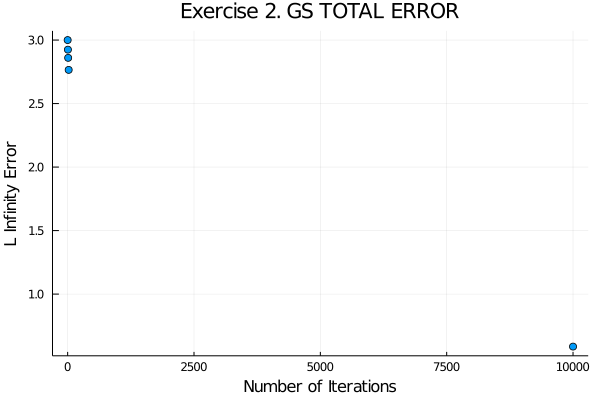

In [341]:
GS_tot_e = [maximum(GS_0_e), maximum(GS_5_e), maximum(GS_10_e), maximum(GS_20_e), maximum(GS_big_e)]
iters = [0, 5, 10, 20, 10^4]

exer_2_GS_tot_e = scatter(iters, GS_tot_e, 
    title = "Exercise 2. GS TOTAL ERROR",
    label = false,
    ylabel = "L Infinity Error",
    xlabel = "Number of Iterations")

In [342]:
CG_0 = u0
CG_5 = cg(A, F, maxiter =5)
CG_10 = cg(A, F, maxiter =10)
CG_20 = cg(A, F, maxiter =20)
CG_big, hist = cg(A, log = true, F);

CG_0_e = get_error(true_u, CG_0, xjs)
CG_5_e = get_error(true_u, CG_5, xjs)
CG_10_e = get_error(true_u, CG_10, xjs)
CG_20_e = get_error(true_u, CG_20, xjs)
CG_big_e = get_error(true_u, CG_big, xjs);

In [343]:
exer_2_CG_sol = plot(x -> true_u(x), 0, 1,
    title = "Exercise 2. CG",
    label = "True Solution",
    color = "yellow")
exer_2_CG_sol = plot!(xjs, CG_0,
    label = "0 iterations",
    color = "blue")
exer_2_CG_sol = plot!(xjs, CG_5,
    label = "5 iterations",
    color = "green")
exer_2_CG_sol = plot!(xjs, CG_10,
    label = "10 iterations",
    color = "orange")
exer_2_CG_sol = plot!(xjs, CG_20,
    label = "20 iterations",
    color = "pink")
exer_2_CG_sol = plot!(xjs, CG_big,
    label = "$(hist.iters) iterations",
    color = "red",
    alpha = 0.5,
    linestyle = :dash);

In [344]:
exer_2_CG_e = plot(x -> 0, 0, 1,
    title = "Exercise 2. CG ERROR",
    label = false,
    color = "yellow")
exer_2_CG_e = plot!(xjs, CG_0_e,
    label = "0 iterations",
    color = "blue")
exer_2_CG_e = plot!(xjs, CG_5_e,
    label = "5 iterations",
    color = "green")
exer_2_CG_e = plot!(xjs, CG_10_e,
    label = "10 iterations",
    color = "orange")
exer_2_CG_e = plot!(xjs, CG_20_e,
    label = "20 iterations",
    color = "pink")
exer_2_CG_e = plot!(xjs, CG_big_e,
    label = "$(hist.iters) iterations",
    color = "red",
    alpha = 0.5,
    linestyle = :dash);

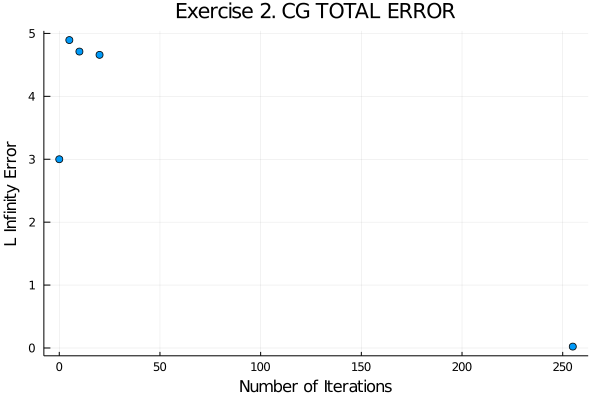

In [345]:
CG_tot_e = [maximum(CG_0_e), maximum(CG_5_e), maximum(CG_10_e), maximum(CG_20_e), maximum(CG_big_e)] 
iters = [0, 5, 10, 20, hist.iters]

exer_2_CG_tot_e = scatter(iters, CG_tot_e, 
    title = "Exercise 2. CG TOTAL ERROR",
    label = false,
    ylabel = "L Infinity Error",
    xlabel = "Number of Iterations")

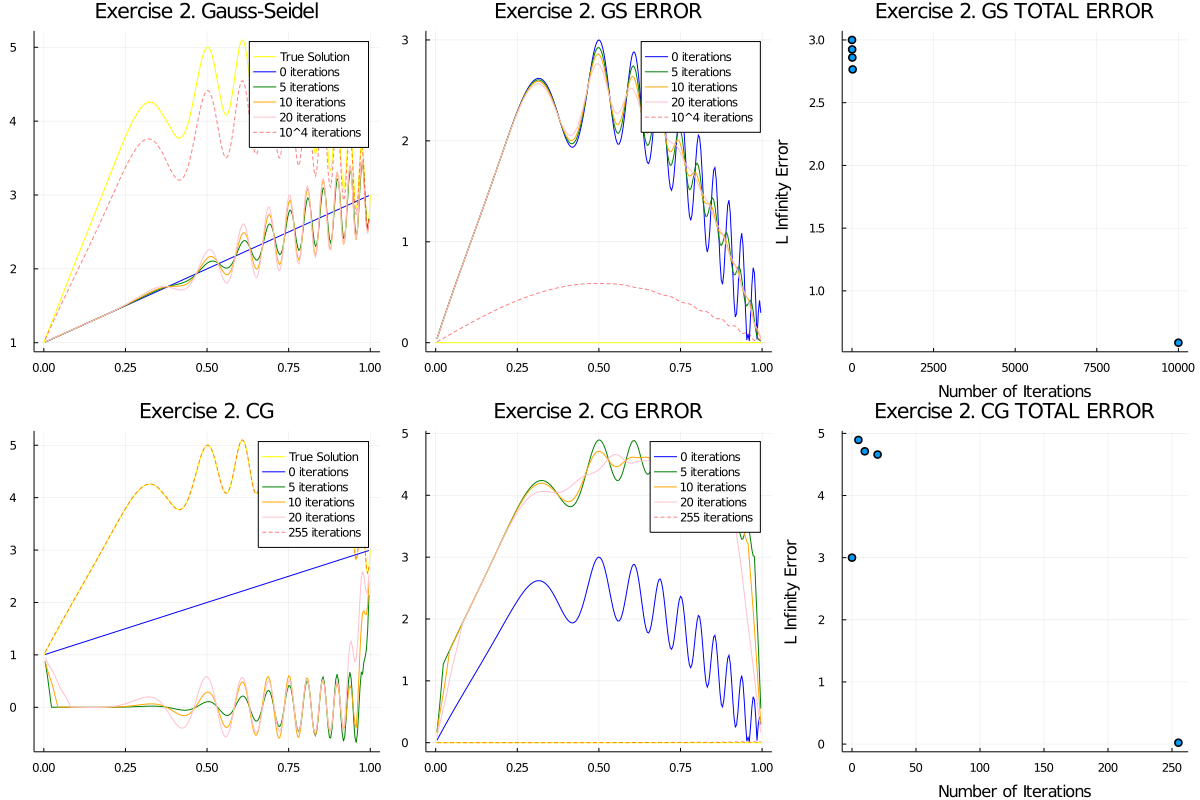

In [347]:
exer_2 = plot( exer_2_GS_sol, exer_2_GS_e,exer_2_GS_tot_e, exer_2_CG_sol, exer_2_CG_e,  exer_2_CG_tot_e, layout = (2, 3), size = (1200, 800))

In [348]:
savefig(exer_2, "../hw/figs/hw-6-exer-2-gs-cg.png")

## Exercise 3

In [133]:
A = make_A(20)

20×20 Array{Float64,2}:
 -882.0   441.0     0.0     0.0     0.0  …     0.0     0.0     0.0     0.0
  441.0  -882.0   441.0     0.0     0.0        0.0     0.0     0.0     0.0
    0.0   441.0  -882.0   441.0     0.0        0.0     0.0     0.0     0.0
    0.0     0.0   441.0  -882.0   441.0        0.0     0.0     0.0     0.0
    0.0     0.0     0.0   441.0  -882.0        0.0     0.0     0.0     0.0
    0.0     0.0     0.0     0.0   441.0  …     0.0     0.0     0.0     0.0
    0.0     0.0     0.0     0.0     0.0        0.0     0.0     0.0     0.0
    0.0     0.0     0.0     0.0     0.0        0.0     0.0     0.0     0.0
    0.0     0.0     0.0     0.0     0.0        0.0     0.0     0.0     0.0
    0.0     0.0     0.0     0.0     0.0        0.0     0.0     0.0     0.0
    0.0     0.0     0.0     0.0     0.0  …     0.0     0.0     0.0     0.0
    0.0     0.0     0.0     0.0     0.0        0.0     0.0     0.0     0.0
    0.0     0.0     0.0     0.0     0.0        0.0     0.0     0.0     0.0
 

In [283]:
function interpolate_coarse(u_coarse)
M_coarse = length(u_coarse)
u_fine = zeros(2*M_coarse)
    
for i in 1:M_coarse
    u_fine[2*i] = u_coarse[i]
end

for i in 1:(M_coarse-1)
    u_fine[2*i + 1] = (u_coarse[i+1] + u_coarse[i])/2
end
    u_fine[1] = u_coarse[1]/2
    return u_fine
end

function restrict_fine(u_fine)
    M_fine = length(u_fine)
    M_coarse = div(M_fine, 2)
    u_coarse = zeros(M_coarse)
    
    for i in 1:M_coarse
       u_coarse[i] = u_fine[2*i] 
    end
    return u_coarse
end

restrict_fine (generic function with 1 method)

In [284]:
M = 2^6
h = 1/(M+1)
xjs = [j*h for j in 1:M]
u0 = [ 1 + 2*xj for xj in xjs]

64-element Array{Float64,1}:
 1.0307692307692307
 1.0615384615384615
 1.0923076923076924
 1.123076923076923
 1.1538461538461537
 1.1846153846153846
 1.2153846153846155
 1.2461538461538462
 1.2769230769230768
 1.3076923076923077
 1.3384615384615386
 1.3692307692307693
 1.4
 ⋮
 2.6307692307692307
 2.661538461538462
 2.6923076923076925
 2.723076923076923
 2.753846153846154
 2.7846153846153845
 2.8153846153846156
 2.8461538461538463
 2.876923076923077
 2.907692307692308
 2.9384615384615387
 2.9692307692307693

In [285]:
function under_jac(A, b, u0, max_iter; ω = 2/3)    
  # Defining M and N
    M = (1/ω)*diag(A)
    #M = diag(A)
    N = Diagonal(M) - A
    
    # Initializing storage for u
    u_iter = Vector{Vector{Float64}}(undef, max_iter+1)
    u_iter[1] = u0 

    for iter in 2:(max_iter+1)
        u_iter[iter] = (1 ./ M) .* (N*u_iter[iter-1] + b)
        #u_iter[iter] = (1 - ω)*u_iter[iter-1] + ω*(1 ./ M) .* (N*u_iter[iter-1] + b)
    end
   return u_iter
end

under_jac (generic function with 2 methods)

In [286]:
function full_multi_grid(v, n_levels, M, method)
    # Grid sizes
    g_sizes = [Int(M / 2^(level)) for level in 0:(n_levels-1)]
    
    # Down recurse
    
    # Make proper size A
    
    A = [make_A(level) for level in g_sizes]
    F = [make_F(level, f, 1, 3) for level in g_sizes] 
    #A = make_A(g_sizes[1])
    
    u = [1 + 2*x / (g_sizes[end] + 1) for x in 1:g_sizes[end]]
    for level in reverse(1:n_levels)
        u = method(A[level], F[level], u, v)[end]
        
        if level > 1
            u = interpolate_coarse(u)
        end
    end  
    return u
end
    

#u = full_multi_grid(500, 6, M, under_jac)

full_multi_grid (generic function with 1 method)

In [287]:
function multi_grid(v, n_cycles, n_levels, M, u, method)
    # Grid sizes
    g_sizes = [Int(M / 2^(level)) for level in 0:(n_levels-1)]
    
    # Down recurse
    
    # Make proper size A
    
    A = [make_A(level) for level in g_sizes]
    F = [make_F(level, f, 1, 3) for level in g_sizes]     
    
    e = Vector{Vector{Float64}}(undef, n_levels)
    r = Vector{Vector{Float64}}(undef, n_levels)
    ef = Vector{Vector{Float64}}(undef, n_levels)

    for k in 1:n_cycles
        # Compute Initial Residual
        r[1] = F[1] - A[1]*u
        # Compute initial error
        e[1] = method(A[1], r[1], zeros(g_sizes[1]), v)[end]

        for level in 2:(n_levels-1)
            # Project residual to smaller grid
            ef[level] = restrict_fine(r[level-1])
            # Solve for error
            e[level] = method(A[level], ef[level], zeros(g_sizes[level]), v)[end]
            # Update residual with new error
            r[level] = ef[level] - A[level]*e[level]
        end 
            
        # Solving on coarsest grid
        ef[end] = restrict_fine(r[end-1])
        d = A[end] \ ef[end]

        for level in reverse(2:n_levels-1)
            d = interpolate_coarse(d) + e[level]            
            d = method(A[level],  ef[level], d, v)[end]
        end
        
        d = interpolate_coarse(d) + e[1]            

        u += d
        u = method(A[1], F[1], u, v)[end]
    end
    return u
end
    
#u = multi_grid(3, 2, 2, M, u0, GS_iter)

multi_grid (generic function with 1 method)

In [288]:
function two_grid(v, n_cycles, M, u, method)
    # Grid sizes
    g_sizes = [Int(M / 2^(level)) for level in 0:1]
    
    # Down recurse
    
    # Make proper size A
    
    A = [make_A(level) for level in g_sizes]
    F = [make_F(level, f, 1, 3) for level in g_sizes]     
    
    e = Vector{Vector{Float64}}(undef, 2)
    r = Vector{Vector{Float64}}(undef, 2)

    # Pre-smooth
    u = method(A[1], F[1], u, v)[end]

    for k in 1:n_cycles
        # Compute Initial Residual
        r[1] = F[1] - A[1]*u
    
        # Project residual to smaller grid
        r[2] = restrict_fine(r[1])
        
        # Solve for error on coarse grid
        e[2] = method(A[2], r[2], zeros(g_sizes[2]), v)[end]
        # e[2] = A[2] \ r[2]
        
        # Scale up to fine grid
        e[1] = interpolate_coarse(e[2])
        
        # Update approximate solution
        u = u + e[1]
        
        # post-smoothing
        u = method(A[1], F[1], u, v)[end]
    end
    return u
end

M = 2^6
h = 1/(M+1)
xjs = [j*h for j in 1:M]
u0 = [ 1 + 2*xj for xj in xjs]

u = two_grid(3, 500, M, u0, under_jac)

64-element Array{Float64,1}:
 1.1823098249956907
 1.360573296255838
 1.5354777777606623
 1.7077104874097102
 1.8779577678212769
 2.046902531390069
 2.2152176261697933
 2.3835513576752727
 2.552499770593132
 2.7225582467410594
 2.8940432609209457
 3.066973715054326
 3.2409017606154307
 ⋮
 4.488631620391491
 3.3845972335922885
 4.264616285145567
 4.403618904148157
 3.084924304395966
 4.244338677900736
 3.8011039852564577
 2.9290505436670067
 4.366049212042762
 2.5476065565802823
 3.8393363868419095
 2.885561166863964

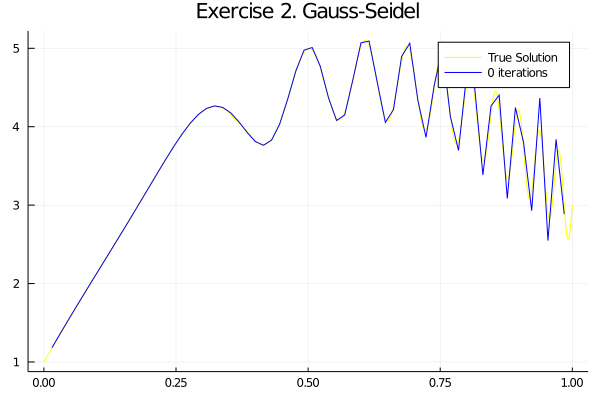

In [289]:
plot(x -> true_u(x), 0, 1,
    title = "Exercise 2. Gauss-Seidel",
    label = "True Solution",
    color = "yellow")
exer_2_GS_sol = plot!(xjs, u,
    label = "0 iterations",
    color = "blue")

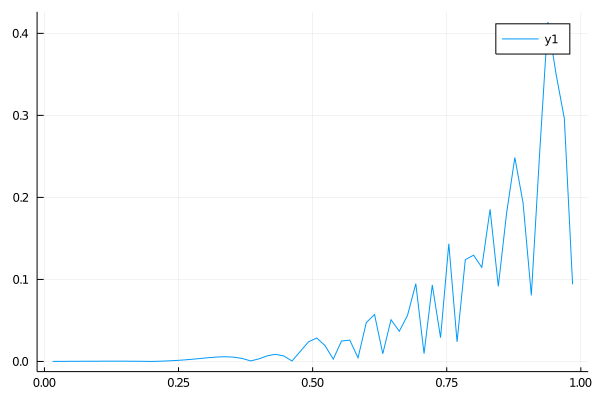

In [290]:
plot(xjs, get_error(true_u, u, xjs))

In [291]:
get_L2_error(true_u, u, xjs)

0.011333526512984454

In [292]:
## Two Grid multi grid v cycle

In [293]:
M_vec = [2^n for n in 3:10]
tol = []

## Loop over n get error
for M in M_vec
    h = 1/(M+1)
    xjs = [j*h for j in 1:M]
    u0 = [1 + 2*xj for xj in xjs]
    u = two_grid(3, 100, M, u0, GS_iter)
    push!(tol, sqrt(sum(h*(get_error(true_u, u, xjs)).^2) ))
end
tol

8-element Array{Any,1}:
 104.49336087281534
  39.7816864331069
   9.430721803389329
   0.11649345729731984
   0.7761438065517052
   1.5002734788792298
   1.7761647167771497
   1.855996734892714

In [294]:
function multi_grid_fixed_tol(v, n_levels, M, u, method, tol = 0.001, maxiter = 200)
    # Grid sizes
    g_sizes = [Int(M / 2^(level)) for level in 0:(n_levels-1)]
    
    h = 1/(M+1)
    xjs = [j*h for j in 1:M]
    
    # Make proper size A
    
    A = [make_A(level) for level in g_sizes]
    F = [make_F(level, f, 1, 3) for level in g_sizes]     
    
    e = Vector{Vector{Float64}}(undef, n_levels)
    r = Vector{Vector{Float64}}(undef, n_levels)
    ef = Vector{Vector{Float64}}(undef, n_levels)

    n_cycles = 0
    while n_cycles < maxiter
        # Compute Initial Residual
        r[1] = F[1] - A[1]*u
        # Compute initial error
        e[1] = method(A[1], r[1], zeros(g_sizes[1]), v)[end]

        for level in 2:(n_levels-1)
            # Project residual to smaller grid
            ef[level] = restrict_fine(r[level-1])
            # Solve for error
            e[level] = method(A[level], ef[level], zeros(g_sizes[level]), v)[end]
            # Update residual with new error
            r[level] = ef[level] - A[level]*e[level]
        end 
            
        # Solving on coarsest grid
        ef[end] = restrict_fine(r[end-1])
        d = A[end] \ ef[end]

        for level in reverse(2:n_levels-1)
            d = interpolate_coarse(d) + e[level]            
            d = method(A[level],  ef[level], d, v)[end]
        end
        
        d = interpolate_coarse(d) + e[1]            

        u += d
        u = method(A[1], F[1], u, v)[end]
                
        n_cycles += 1

        if maximum(get_error(true_u, u, xjs)) < tol
            return n_cycles
        end
        
    end
    return n_cycles
end


function two_grid_fixed_tol(v, M, u, method, tol = 0.001, maxiter = 200)
    # Grid sizes
    g_sizes = [Int(M / 2^(level)) for level in 0:1]
    
    h = 1/(M+1)
    xjs = [j*h for j in 1:M]
    
    # Make proper size A
    
    A = [make_A(level) for level in g_sizes]
    F = [make_F(level, f, 1, 3) for level in g_sizes]     
    
    e = Vector{Vector{Float64}}(undef, 2)
    r = Vector{Vector{Float64}}(undef, 2)

    # Pre-smooth
    #u = method(A[1], F[1], u, v)[end]
    
    n_cycles = 0
    while n_cycles < maxiter
        # Compute Initial Residual
        r[1] = F[1] - A[1]*u
    
        # Project residual to smaller grid
        r[2] = restrict_fine(r[1])
        
        # Solve for error on coarse grid
        #e[2] = method(A[2], r[2], zeros(g_sizes[2]), v)[end]
        e[2] = A[2] \ r[2]
        
        # Scale up to fine grid
        e[1] = interpolate_coarse(e[2])
        
        # Update approximate solution
        u = u + e[1]
        
        # post-smoothing
        u = method(A[1], F[1], u, v)[end]
        
        n_cycles += 1

        #println(get_L2_error(true_u, u))
        if get_L2_error(true_u, u) < tol
            return n_cycles
        end
    end
    return n_cycles
end



two_grid_fixed_tol (generic function with 3 methods)

In [322]:
M_vec = [50*n for n in 3:20]
cycles_needed = []

## Loop over n get error
for M in M_vec
    h = 1/(M+1)
    xjs = [j*h for j in 1:M]
    u0 = [1 + 2*xj for xj in xjs]
    
     push!(cycles_needed, 
        two_grid_fixed_tol(1, M, u0, under_jac, 0.001, 20))
end
cycles_needed

18-element Array{Any,1}:
 5
 5
 7
 7
 7
 7
 7
 7
 5
 5
 5
 5
 5
 5
 5
 5
 5
 5

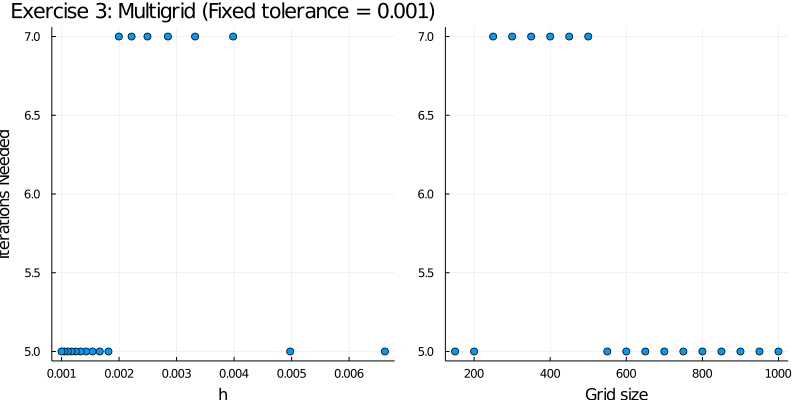

In [327]:
exer_3_iters_needed_1 = scatter(1 ./ (M_vec .+ 1), 
    cycles_needed,
    label = false,
    ylabel = "Iterations Needed",
    xlabel = "h",
    title = "Exercise 3: Multigrid (Fixed tolerance = 0.001)")

exer_3_iters_needed_2 = scatter(M_vec, 
    cycles_needed,
    label = false,
    xlabel = "Grid size")


exer_3_iters_needed = plot(exer_3_iters_needed_1, exer_3_iters_needed_2, size = (800, 400))

In [328]:
savefig(exer_3_iters_needed, "../hw/figs/hw-6-exer-3-multigrid.png")